# Libraries

In [17]:
# Import necessary libraries

import pandas as pd  # Import the pandas library for data manipulation
import geopandas as gpd  # Import geopandas for handling geospatial data
import mapclassify  # Import mapclassify for spatial data classification
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for statistical data visualization

# Import Plotly for interactive plotting
import plotly.express as px  # Import plotly express for easy-to-use plotting functions
import plotly.graph_objects as go  # Import plotly graph objects for detailed plotting
from plotly.subplots import make_subplots  # Import for creating subplots in plotly


# Dataset1:Visualization

In [18]:
# Specify the file path
shapefile_path = r'C:\Users\DELL\Downloads\kx-nz-police-area-boundaries-29-april-2021-SHP\nz-police-area-boundaries-29-april-2021.shp'

dataset1 = gpd.read_file(shapefile_path)

# Displaying Data Types of Columns
data_types = dataset1.dtypes
print("Data Types of Columns:")
print(data_types)

Data Types of Columns:
AREA_ID         object
AREA_NAME       object
DISTRICT_I      object
DISTRICT_N      object
A_MACRON        object
D_MACRON        object
geometry      geometry
dtype: object


# Choropleth maps(To visualize spatial distributions)

In [19]:
# Define a color palette for each district
district_colors = {
    'Auckland City': 'blue',
    'Bay of Plenty': 'red',
    'Canterbury': 'green',
    'Central': 'orange',
    'Counties/Manukau': 'purple',
    'Eastern': 'yellow',
    'Northland': 'cyan',
    'Waitemata': 'magenta',
    'Southern': 'pink',
    'Tasman': 'brown',
    'Waikato': 'gray',
    'Wellington': 'olive'
}

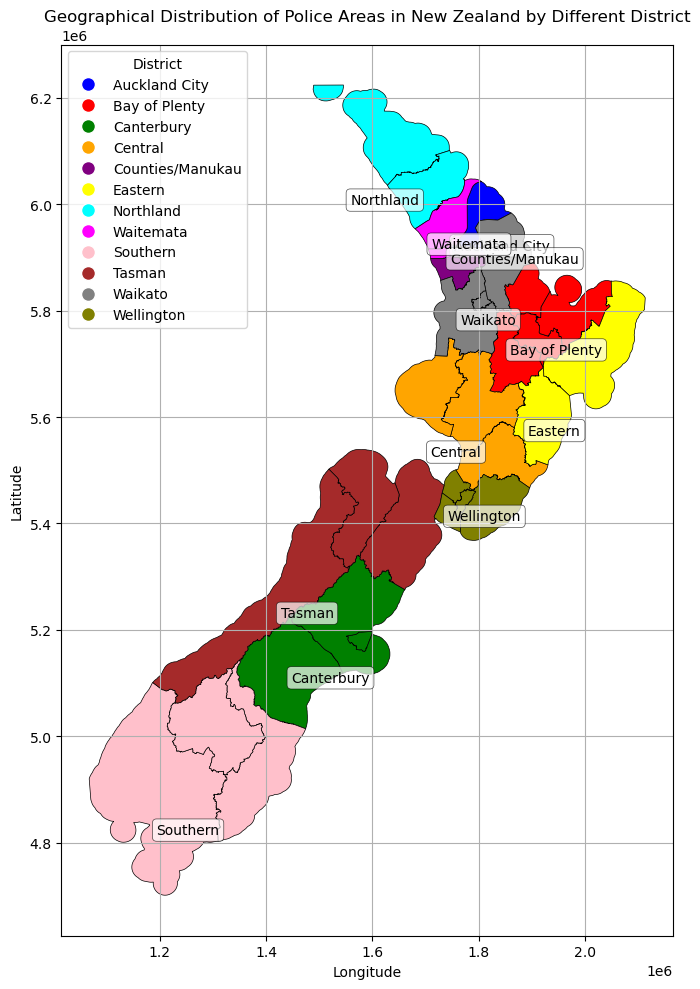

In [20]:
#To visualize the geographical distribution of police areas in New Zealand based on their district names, 
#with each district represented by a different color
# Plotting police area boundaries with latitude and longitude
fig, ax = plt.subplots(figsize=(12, 10))

# Plot police area boundaries with different colors for each district
for district, color in district_colors.items():
    district_data = dataset1[dataset1['DISTRICT_N'] == district]
    district_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)
    # Annotate each district with its name at the bottom-left corner
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5, alpha=0.7)
    ax.text(district_data.bounds.minx.mean(), district_data.bounds.miny.mean(), district, ha='left', va='bottom',
            fontsize=10, color='black', bbox=bbox_props)

# Set title and labels
plt.title('Geographical Distribution of Police Areas in New Zealand by Different District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a custom legend for district colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=district, markerfacecolor=color, markersize=10) 
                   for district, color in district_colors.items()]
plt.legend(handles=legend_elements, loc='upper left', title='District')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

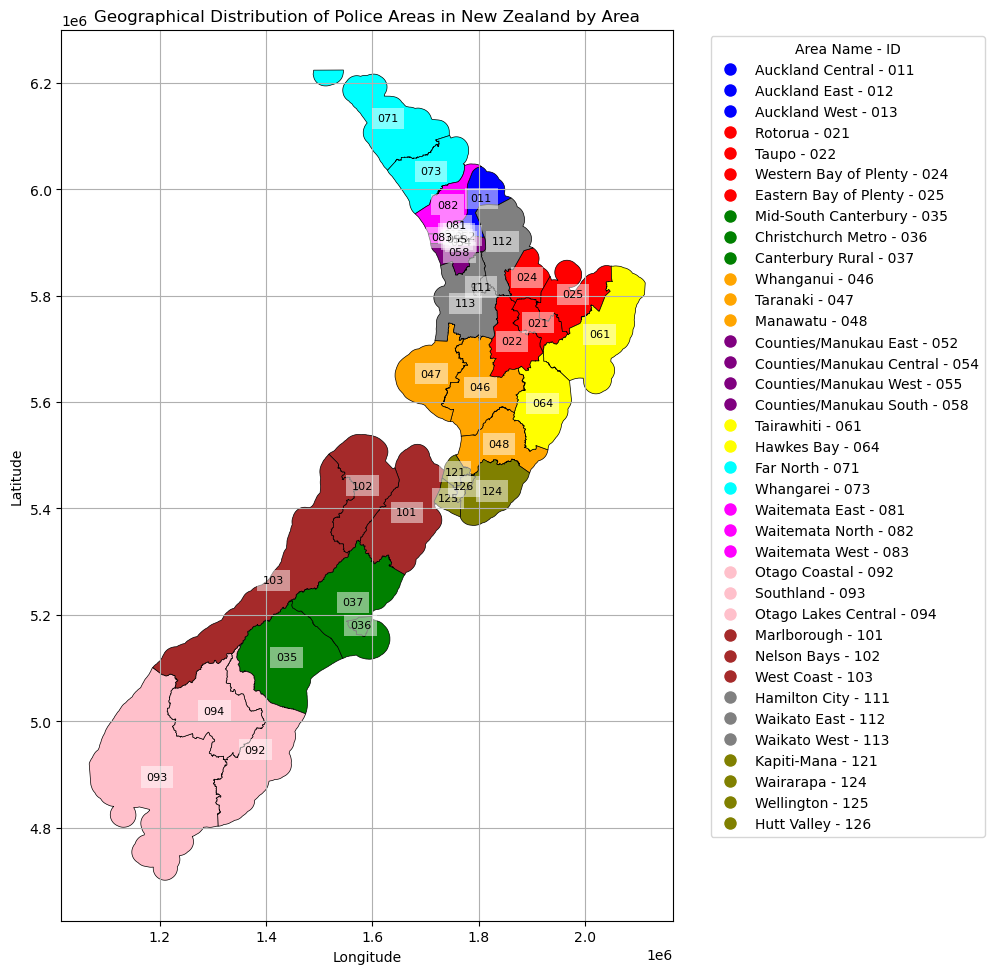

In [21]:
#Geographical Distribution of Police Areas in New Zealand by Area(Area_Name & Area_ID by District)

# Plotting police area boundaries with latitude and longitude
fig, ax = plt.subplots(figsize=(12, 10))

# Plot police area boundaries with different colors for each district
for district, color in district_colors.items():
    district_data = dataset1[dataset1['DISTRICT_N'] == district]
    district_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)
    # Annotate each area with its ID at the centroid
    for x, y, area_id in zip(district_data.geometry.centroid.x, district_data.geometry.centroid.y, district_data['AREA_ID']):
        ax.text(x, y, area_id, ha='center', va='center', fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Set title and labels
plt.title('Geographical Distribution of Police Areas in New Zealand by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a custom legend for district colors with AREA_NAME
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{area} - {area_id}', markerfacecolor=district_colors[district], markersize=10) 
                   for district in district_colors.keys() for area_id, area in zip(dataset1[dataset1['DISTRICT_N'] == district]['AREA_ID'], dataset1[dataset1['DISTRICT_N'] == district]['AREA_NAME'])]
plt.legend(handles=legend_elements, title='Area Name - ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Define a color palette for each district
district_colors = {
    'Auckland City': 'blue',
    'Bay of Plenty': 'red',
    'Canterbury': 'green',
    'Central': 'orange',
    'Counties/Manukau': 'purple',
    'Eastern': 'yellow',
    'Northland': 'cyan',
    'Waitemata': 'magenta',
    'Southern': 'pink',
    'Tasman': 'brown',
    'Waikato': 'gray',
    'Wellington': 'olive'
}

# Create the bar plot
fig = go.Figure()

# Add bars for each district
for district, count in area_count_per_district.items():
    fig.add_trace(go.Bar(
        x=[district],
        y=[count],
        name=district,
        marker_color=district_colors.get(district, 'lightgrey')
    ))

# Customize the layout
fig.update_layout(
    title='Number of Police Areas per District',
    xaxis_title='District',
    yaxis_title='Number of Police Areas',
    xaxis_tickangle=-45,
    barmode='stack',
    yaxis=dict(showgrid=True)
)

# Show plot
fig.show()


# Visualization and Analysis of dataset df5(stolen vehicles + Police district)

In [23]:
# Read the cleaned and merged CSV file into a DataFrame
df5=pd.read_csv(r'C:\Users\DELL\3sem_project\stolenvechilesdf3(cleandata4_N_merged).csv')

In [24]:
df5

,no_plate,color,company_name,model_year,vehicle_type,date_stolen,district_name,No_Police_Areas
0,PZQ399,SILVER,MAZDA,1999,CAR,2023-10-14,Bay of Plenty,4
1,LLF27,BLACK,MAZDA,2009,CAR,2023-10-15,Bay of Plenty,4
2,EJM12,SILVER,TOYOTA,1998,CAR,2023-10-16,Bay of Plenty,4
3,C4GUS,BLACK,FORZA,2021,MOTORCYCLE,2023-10-16,Bay of Plenty,4
4,343F2,WHITE,ELDDIS,2004,CAMPER,2023-10-16,Bay of Plenty,4
...,...,...,...,...,...,...,...,...
6305,LAS107,WHITE,HONDA,2017,CAR,2024-05-01,Tasman,3
6306,HNC464,BLUE,TOYOTA,1994,CAR,2024-05-02,Tasman,3
6307,JQD358,BLACK,HONDA,2005,CAR,2024-05-10,Tasman,3
6308,WR2755,BLUE,MITSUBISHI,1997,CAR,2024-05-10,Tasman,3


In [25]:
# Convert 'date_stolen' column to datetime format
df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])

# Display the data types of each column in the DataFrame
print(df5.dtypes)

no_plate                   object
color                      object
company_name               object
model_year                  int64
vehicle_type               object
date_stolen        datetime64[ns]
district_name              object
No_Police_Areas             int64
dtype: object


In [26]:
# Create a dictionary to map each district to a unique color
district_color_map = {
    'Auckland City': 'blue',
    'Bay of Plenty': 'red',
    'Canterbury': 'green',
    'Central': 'orange',
    'Counties/Manukau': 'purple',
    'Eastern': 'yellow',
    'Northland': 'cyan',
    'Waitemata': 'magenta',
    'Southern': 'pink',
    'Tasman': 'brown',
    'Waikato': 'gray',
    'Wellington': 'olive'
}

In [27]:
#By district_name
# Count of stolen vehicles by district
district_theft_counts = df5['district_name'].value_counts()
print(district_theft_counts)

# Count of stolen vehicles by district
fig = px.bar(district_theft_counts, 
             x=district_theft_counts.values, 
             y=district_theft_counts.index, 
             orientation='h',
             title='Count of Stolen Vehicles by District',
             color=district_theft_counts.index,  # Assigning colors based on district names
             color_discrete_map=district_color_map)  # Using the district_color_map dictionary
fig.update_layout(xaxis_title='Count', yaxis_title='District Name')
fig.show()

district_name
Counties/Manukau    993
Canterbury          897
Auckland City       702
Waitemata           666
Waikato             635
Wellington          625
Bay of Plenty       527
Central             436
Northland           316
Eastern             295
Southern            142
Tasman               76
Name: count, dtype: int64


In [40]:
#Analyzing the relationship between vehicle thefts and the number of police areas across different districts
#And
#Calculates the correlation coefficient between the number of vehicle thefts and the number of police areas for each district
# Aggregate data by district
district_theft_counts = df5['district_name'].value_counts().reset_index()
district_theft_counts.columns = ['district_name', 'theft_count']

# Get the number of police areas for each district (assuming it's consistent within each district)
district_police_areas = df5[['district_name', 'No_Police_Areas']].drop_duplicates()

# Merge the dataframes
district_data = pd.merge(district_theft_counts, district_police_areas, on='district_name')

# Calculate correlation coefficient
correlation = district_data['theft_count'].corr(district_data['No_Police_Areas'])
print("Correlation coefficient:", correlation)
#It indicates a moderate positive correlation between the number of vehicle thefts and the number of police areas
# in the districts. A correlation coefficient closer to 1 suggests a strong positive 
#correlation, meaning as one variable increases, the other tends to increase as well


# Create figure with secondary y-axis
fig = go.Figure()

# Add bar plot for vehicle thefts
fig.add_trace(
    go.Bar(
        x=district_data['district_name'],
        y=district_data['theft_count'],
        name='Vehicle Thefts',
        marker=dict(color=[district_color_map[district] for district in district_data['district_name']]),
        yaxis='y1'
    )
)

# Add line plot for number of police areas
fig.add_trace(
    go.Scatter(
        x=district_data['district_name'],
        y=district_data['No_Police_Areas'],
        name='Police Areas',
        mode='lines+markers',
        marker=dict(color='lightseagreen', size=8),  # Set marker color to lightseagreen
        yaxis='y2'
    )
)

# Update layout for dual y-axes
fig.update_layout(
    title='Vehicle Thefts and Number of Police Areas by District',
    xaxis=dict(title='District'),
    yaxis=dict(
        title='Number of Vehicle Thefts',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Number of Police Areas',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.7, y=0.9),  # Move legend to upper right corner
)

# Show plot
fig.show()

Correlation coefficient: 0.48371803686618153


In [29]:
#By Vehicle type
# Count of stolen vehicle by Vehicle type analysis
vehicle_type_counts = df5['vehicle_type'].value_counts()
print(vehicle_type_counts)

# Count of stolen vehicle by Vehicle type by bubble chart
fig = px.scatter(df5, x=vehicle_type_counts.index, y=vehicle_type_counts.values, 
                 size=vehicle_type_counts.values, color=vehicle_type_counts.index,
                 title='Bubble Chart of Stolen Vehicles by Type', 
                 labels={'x': 'Vehicle Type', 'y': 'Count'},
                 size_max=100)
fig.show()

vehicle_type
CAR              3439
TRAILER           988
UTILITY TRUCK     873
MOTORCYCLE        552
VAN               324
CAMPER             84
BUS                30
MACHINERY          11
ATV                 9
Name: count, dtype: int64


In [30]:
#By month(name of the month column will be added as 'month' column)

# Count of stolen vehicle by monthly theft

# Extract month
df5['month'] = df5['date_stolen'].dt.month_name()  # Extract month name

# Define the custom order for months
month_order = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']

# Convert the 'month' column to a categorical type with the specified order
df5['month'] = pd.Categorical(df5['month'], categories=month_order, ordered=True)

# Calculate monthly theft counts
monthly_theft_counts = df5['month'].value_counts().reindex(month_order)

# Print monthly theft counts
print(monthly_theft_counts)

#import plotly.express as px

# Pie Chart of Monthly Count of Stolen Vehicles
# Prepare the data for the pie chart
monthly_theft_counts_df = monthly_theft_counts.reset_index()
monthly_theft_counts_df.columns = ['month', 'count']

# Create the pie chart
fig = px.pie(monthly_theft_counts_df, 
             names='month', 
             values='count',
             title='Proportion of Stolen Vehicles by Month', 
             category_orders={'month': month_order},
             labels={'count': 'Count of Stolen Vehicles'})

# Show the pie chart
fig.show()

month
October      415
November     714
December     714
January      811
February     798
March       1006
April       1148
May          704
Name: count, dtype: int64


In [31]:
# Group by month and vehicle type, and unstack the result
monthly_vehicle_type_counts = df5.groupby(['month', 'vehicle_type']).size().unstack().reindex(month_order)

# Plot the stacked bar chart using Plotly Express
fig = px.bar(monthly_vehicle_type_counts, x=monthly_vehicle_type_counts.index, y=monthly_vehicle_type_counts.columns,
             barmode='stack')

# Update layout
fig.update_layout(title='Stacked Bar Chart of Stolen Vehicles by Month and Type',
                  xaxis_title='Month',
                  yaxis_title='Count',
                  xaxis=dict(tickangle=45),
                  legend_title='Vehicle Type')

# Show the plot
fig.show()

In [32]:
# Define color mapping
color_mapping = {
    'SILVER': 'silver',
    'WHITE': 'white',
    'BLACK': 'black',
    'BLUE': 'blue',
    'GREY': 'grey',
    'RED': 'red',
    'GREEN': 'green',
    'GOLD': 'gold',
    'BROWN': 'brown',
    'YELLOW': 'yellow',
    'ORANGE': 'orange',
    'PURPLE': 'purple',
    'CREAM': '#FFFDD0',  # Hexadecimal representation of cream
    'PINK': 'pink'
}


In [33]:
# Group by month and color, and unstack the result
monthly_vehicle_color_counts = df5.groupby(['month', 'color']).size().unstack().reindex(month_order)

# Reset index to make 'month' and 'color' columns
monthly_vehicle_color_counts = monthly_vehicle_color_counts.reset_index()

# Melt the DataFrame to have 'month' as x-axis and 'color' as facet
monthly_vehicle_color_counts_melted = pd.melt(monthly_vehicle_color_counts, id_vars=['month'], var_name='color', value_name='count')

# Plot the grouped bar chart with color as facets
fig = px.bar(monthly_vehicle_color_counts_melted, x='month', y='count', color='color', facet_col='color',
             category_orders={'month': month_order}, facet_col_wrap=3,
             color_discrete_map=color_mapping)  # Map color names to colors

# Update layout
fig.update_layout(title='Grouped Bar Chart of Stolen Vehicles by Month and Color',
                  xaxis_title='Month',
                  yaxis_title='Count',
                  height=900,  # Adjust the height as needed
                  width=700)  # Adjust the width as needed

# Show the plot
fig.show()


In [34]:
#By Color 
color_counts = df5['color'].value_counts()
print(color_counts)

# Create the histogram with the mapped colors
fig = px.bar(x=color_counts.index, y=color_counts.values,
             title='Histogram of Stolen Vehicles by Color',
             labels={'y': 'Count', 'x': 'Color'},
             color=color_counts.index,
             color_discrete_map=color_mapping)

# Customize the layout to use the original color names as labels
fig.update_layout(bargap=0.2)

# Update hover label
fig.update_traces(hovertemplate='Color=%{x}<br>Count=%{y}')

# Update legend label
fig.update_layout(legend_title_text='Color')

fig.show()


color
SILVER    1721
WHITE     1366
BLACK      819
BLUE       657
GREY       603
RED        509
GREEN      284
GOLD       104
BROWN       74
YELLOW      58
ORANGE      51
PURPLE      38
CREAM       15
PINK        11
Name: count, dtype: int64


In [35]:
# Define the vehicle types
vehicle_types = ['CAR', 'TRAILER', 'UTILITY TRUCK', 'MOTORCYCLE', 'VAN']

# Iterate over each vehicle type and print the top 5 company names
for vehicle_type in vehicle_types:
    df_vehicle_type = df5[df5['vehicle_type'] == vehicle_type]
    top_company_names = df_vehicle_type['company_name'].value_counts().head(5)
    print(f"Top 5 company names for {vehicle_type}:")
    print(top_company_names)
    print()

# Visualizing Top Companies by Vehicle Type
#Plotting Top 5 Companies for Each Top 5 Vehicle Type
    #from plotly.subplots import make_subplots
    #import plotly.graph_objects as go

# Get the top 5 vehicle types
top_vehicle_types = df5['vehicle_type'].value_counts().head(5).index

# Create subplots for each vehicle type with vertical spacing
fig = make_subplots(rows=len(top_vehicle_types), cols=1, subplot_titles=[f"Top 5 Companies for {vehicle_type}" for vehicle_type in top_vehicle_types], vertical_spacing=0.1)

# Iterate over each top vehicle type and create a horizontal bar plot
for i, vehicle_type in enumerate(top_vehicle_types):
    # Filter the dataframe for the current vehicle type
    df_vehicle_type = df5[df5['vehicle_type'] == vehicle_type]
    # Get the top 5 companies for the current vehicle type
    top_companies_vehicle_type = df_vehicle_type['company_name'].value_counts().head(5)
    # Create a horizontal bar plot
    trace = go.Bar(y=top_companies_vehicle_type.index, x=top_companies_vehicle_type.values, orientation='h', name=vehicle_type)
    # Add trace to the subplot
    fig.add_trace(trace, row=i+1, col=1)
    # Update layout for the subplot
    fig.update_yaxes(title_text='Company', row=i+1, col=1)
    fig.update_xaxes(title_text='Count of Stolen Vehicles', row=i+1, col=1, title_standoff=1)  # Adjust title_standoff for spacing
    fig.update_layout(title={'text': f"Top 5 Companies for Each Top 5 Vehicle Type", 'x': 0.5})  # Center the main title

# Update layout for the entire figure
fig.update_layout(height=800, width=950)

fig.show()

Top 5 company names for CAR:
company_name
TOYOTA    890
NISSAN    496
MAZDA     451
SUBARU    228
HONDA     216
Name: count, dtype: int64

Top 5 company names for TRAILER:
company_name
HOMEBUILT    687
BRIFORD       64
KEA           30
PINTO         26
TITAN         24
Name: count, dtype: int64

Top 5 company names for UTILITY TRUCK:
company_name
FORD          262
TOYOTA        179
MAZDA         137
NISSAN        118
MITSUBISHI     65
Name: count, dtype: int64

Top 5 company names for MOTORCYCLE:
company_name
SUZUKI       106
YAMAHA        65
HONDA         58
TNT MOTOR     40
KAWASAKI      35
Name: count, dtype: int64

Top 5 company names for VAN:
company_name
TOYOTA        198
NISSAN         39
MITSUBISHI     23
MAZDA          20
HONDA          12
Name: count, dtype: int64



In [36]:
#Vehicle Age vs. Theft Rate Analysis

# Calculate vehicle age
current_year = pd.Timestamp.now().year
df5['vehicle_age'] = current_year - df5['model_year']# here 'vehicle_age' column is created and added in df5

# Filter out vehicles with age greater than 100
df_filtered = df5[df5['vehicle_age'] <= 100]

# Group by vehicle age and count thefts
age_theft_counts = df_filtered.groupby('vehicle_age').size().reset_index(name='theft_count')

# Sort by theft_count in descending order
age_theft_counts_sorted = age_theft_counts.sort_values(by='theft_count', ascending=False).head(10)

# Create the line plot
line_fig = px.line(age_theft_counts, x='vehicle_age', y='theft_count', title='Vehicle Age vs. Theft Rate')
line_fig.update_layout(xaxis_title='Vehicle Age', yaxis_title='Number of Thefts')

# Create the table for highest theft counts
table_trace = go.Table(
    header=dict(values=['Vehicle Age', 'Theft Count'],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[age_theft_counts_sorted['vehicle_age'], 
                       age_theft_counts_sorted['theft_count']],
               fill_color='lavender',
               align='center')
)

# Create subplots with 2 rows, the second row having only the table
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3], 
                    specs=[[{"type": "xy"}, {"type": "table"}]],
                    subplot_titles=["Vehicle Age vs. Theft Rate", "Top 10 Theft Counts by Vehicle Age"])

# Add line plot to the first subplot
fig.add_trace(go.Scatter(x=age_theft_counts['vehicle_age'], y=age_theft_counts['theft_count'], mode='lines', name=''), row=1, col=1)

# Add table to the second subplot
fig.add_trace(table_trace, row=1, col=2)

# Update layout
fig.update_layout(title_text='Vehicle Age vs. Theft Rate', 
                  showlegend=False)

# Show the plot
fig.show()

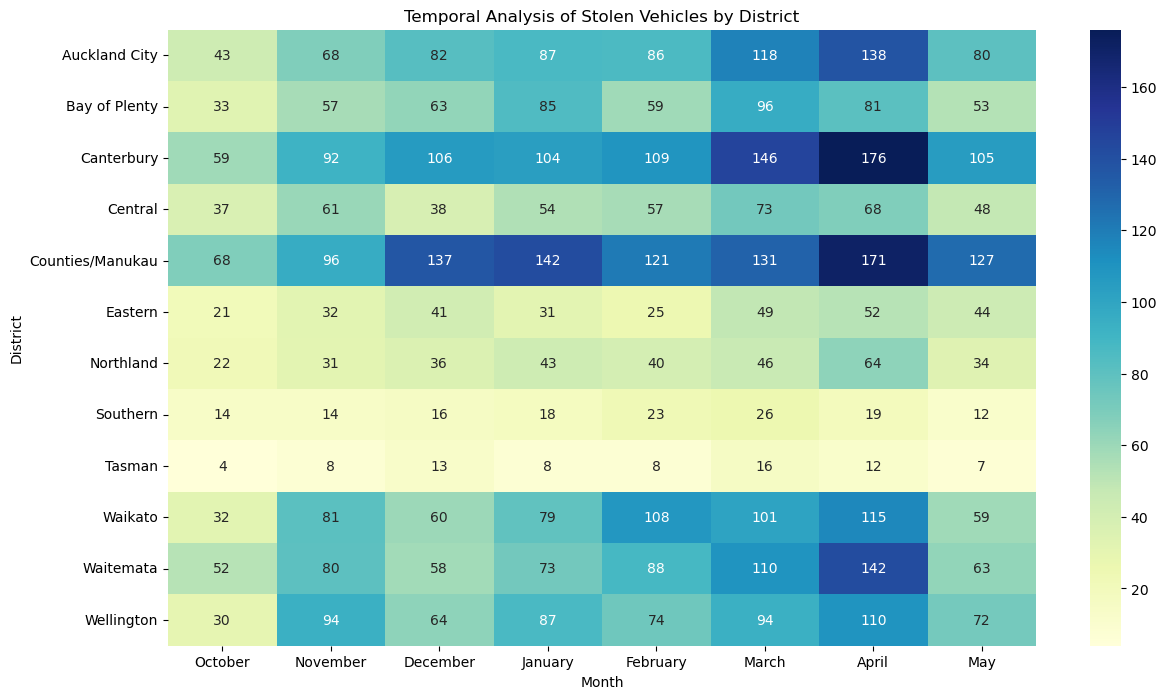

In [37]:
#Temporal Analysis by District:

# Pivot the dataframe to have districts as rows and months as columns
pivot_df = df5.pivot_table(index='district_name', columns='month', aggfunc='size', fill_value=0)

# Reorder the columns to match the desired order
pivot_df = pivot_df.reindex(columns=month_order)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Temporal Analysis of Stolen Vehicles by District')
plt.xlabel('Month')
plt.ylabel('District')
plt.show()

In [38]:
df5

,no_plate,color,company_name,model_year,vehicle_type,date_stolen,district_name,No_Police_Areas,month,vehicle_age
0,PZQ399,SILVER,MAZDA,1999,CAR,2023-10-14,Bay of Plenty,4,October,25
1,LLF27,BLACK,MAZDA,2009,CAR,2023-10-15,Bay of Plenty,4,October,15
2,EJM12,SILVER,TOYOTA,1998,CAR,2023-10-16,Bay of Plenty,4,October,26
3,C4GUS,BLACK,FORZA,2021,MOTORCYCLE,2023-10-16,Bay of Plenty,4,October,3
4,343F2,WHITE,ELDDIS,2004,CAMPER,2023-10-16,Bay of Plenty,4,October,20
...,...,...,...,...,...,...,...,...,...,...
6305,LAS107,WHITE,HONDA,2017,CAR,2024-05-01,Tasman,3,May,7
6306,HNC464,BLUE,TOYOTA,1994,CAR,2024-05-02,Tasman,3,May,30
6307,JQD358,BLACK,HONDA,2005,CAR,2024-05-10,Tasman,3,May,19
6308,WR2755,BLUE,MITSUBISHI,1997,CAR,2024-05-10,Tasman,3,May,27


In [39]:
#To saved update dataset into csv format and view in excel
#df5.to_csv('stolenvechilesdf3(cleandata5_N_merged).csv',index=False)